# Text Language Identification
 


In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**DATA EXPLORATION**

In [3]:
#Loading the Data
raw = pd.read_csv('dataset.csv')

In [4]:
#Manually encoding the labels of language and considering it as the labels for training
languages = list(raw['language'].unique())
l = []
for i in range(raw.shape[0]):
  l.append(languages.index(raw['language'][i]))
raw['nlanguage'] = l

In [5]:
raw.head()

,Text,language,nlanguage
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,0
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,1
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,2
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,3
4,de spons behoort tot het geslacht haliclona en...,Dutch,4


**EXPLORATORY DATA ANALYSIS**

In [24]:
#Merging 2 Labels files for EDA
EDA = raw.drop(["Text"],axis=1)


In [25]:
EDA

,language,nlanguage
0,Estonian,0
1,Swedish,1
2,Thai,2
3,Tamil,3
4,Dutch,4
...,...,...
21995,French,11
21996,Thai,2
21997,Spanish,15
21998,Chinese,12


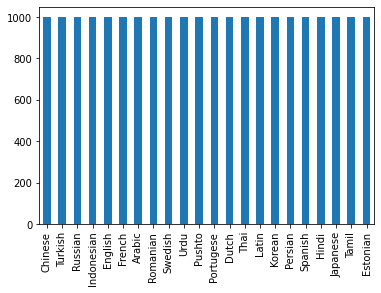

In [ ]:
raw['language'].value_counts().plot(kind = 'bar')

ValueError: ignored

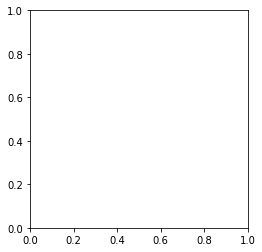

In [ ]:
#Pie Chart
percent_class=raw['language']
labels= raw.language

colors = ['#17C37B','#FF6347','#FACA0C']
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

# **DATA PREPROCESSING**
Performing Basic Cleaning of the Statement in the Tweets.

In [ ]:
#Importing Necessary Libraries for Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


**STOPWORDS**

In [ ]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Load English Stop Words
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

Creating the Funtion to Clean the Twitter Message like Removing URL, Removing Mentions, Hashtags, Digits, HTML Tags and Removing the Connecting words included in 'English'Stop words.

In [ ]:
#Tweet Clean Function
def tweet_clean(twee):
    #Remove URL
    twee = re.sub(r'https?://\S+|www\.\S+', " ", twee)

    #Remove Mentions
    twee = re.sub(r'@\w+',' ',twee)

    #Remove Punctuation
    twee= re.sub(r'[^\w\s\d]',' ',twee)

    #Remove Digits
    twee = re.sub(r'\d+', ' ', twee)

    #Remove HTML tags
    twee = re.sub('r<.*?>',' ', twee)

    #Remove Hastags
    twee = re.sub(r'#\w+', ' ', twee)

    #Remove Stop Words 
    twee = twee.split()
    #twee = " ".join(twee)
    
    twee = " ".join([word for word in twee if not word in stopword])

    return twee

In [ ]:
#Applying Tweet Clean Function to Both Files
tweet_data['Tweet'] = tweet_data['Tweet'].astype(str).apply(lambda x: tweet_clean(x))
kaggle_data['Tweet'] = kaggle_data['Tweet'].astype(str).apply(lambda x: tweet_clean(x))

In [ ]:
#Updated Sentiment Data
tweet_data["Tweet"]

0        Gaisss Please read please limit go outside ple...
1        Today week lockdown lot confectionary stores r...
2        Tuskys partners Amref provide ground health ed...
3        u ur grocery shopping like regular person u st...
4        UK Critical Care Nurse Cries Empty SuperMarket...
                               ...                        
37036    Minnesota classifies grocery store workers eme...
37037    US Senator asked information leveragedloans pr...
37038    Just commented Poll Are online shopping normal...
37039    My wife got laid yesterday small retail store ...
37040    Humanity doomed coronavirus coronacrisis toile...
Name: Tweet, Length: 37041, dtype: object

In [ ]:
#Converting Tweets to String for Stemming and Word Net Lemmatizer 
tweets = tweet_data["Tweet"]
print(tweets)

0        Gaisss Please read please limit go outside ple...
1        Today week lockdown lot confectionary stores r...
2        Tuskys partners Amref provide ground health ed...
3        u ur grocery shopping like regular person u st...
4        UK Critical Care Nurse Cries Empty SuperMarket...
                               ...                        
37036    Minnesota classifies grocery store workers eme...
37037    US Senator asked information leveragedloans pr...
37038    Just commented Poll Are online shopping normal...
37039    My wife got laid yesterday small retail store ...
37040    Humanity doomed coronavirus coronacrisis toile...
Name: Tweet, Length: 37041, dtype: object


**PORTER STEMMER** 
The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. 


In [ ]:
#Porter Stemmer
stemmer=nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tweets)

In [ ]:
tweets[0]

'Gaisss Please read please limit go outside please please always wash hands always use hand sanitizer And please get ready stock food'

**WORDNET LEMMATIZER** 
Lemmatize using WordNet's built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.

In [ ]:
#Downloading Wordnet
#nltk.download('wordnet')

In [ ]:
#Word Net Lemmatizer
#stemmer=nltk.stem.WordNetLemmatizer()
#" ".join(stemmer.lemmatize(token) for token in tweets)

In [ ]:
tweets[5]

'Makes heart ache elderly make disease either people want yo starve force every day expose bulk buy selfish b ds stopthepeak stayhome'

**TOKEN INITIALIZATION**

In [ ]:
#Splitting the Data set into Dependent and Independent Features
X=raw['Text']
y=raw['nlanguage']

In [ ]:
#Maximum Length of Sequence
max_len = np.max(X.apply(lambda x :len(x)))
print("Maximum length of sequence:",max_len)

Maximum length of sequence: 1341


In [ ]:
#Initializing Tokens
tokenizer = Tokenizer()

#Text to Sequence
tokenizer.fit_on_texts(X)
vocab_length = len(tokenizer.word_index)+1
print("Length of Word Index:",vocab_length)
X = tokenizer.texts_to_sequences(X)

#Post Padding
X = pad_sequences(X,maxlen=max_len, padding='post')

Length of Word Index: 273968


In [ ]:
#Array of Tweet Data
X

array([[ 32328,  96397,  14738, ...,      0,      0,      0],
       [ 96411,   3149,  22200, ...,      0,      0,      0],
       [ 58287,  58288,  58289, ...,      0,      0,      0],
       ...,
       [   118,  11675,      1, ...,      0,      0,      0],
       [273960, 273961,     16, ...,      0,      0,      0],
       [  3012,  21731,  57498, ...,      0,      0,      0]], dtype=int32)

In [ ]:
#Shape of X
X.shape

(22000, 1341)

In [ ]:
#Transforming a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

# **MODEL SELECTION**
Implementing 2 NLP Models such as RNN Model with GRU and LSTM Architecture

In [ ]:
#Performing Test-Train-Valid Split in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [ ]:
#Shape of the Training and Testing Data
X_train.shape, X_test.shape,  y_train.shape, y_test.shape #,y_val.shape,X_val.shape

((17600, 1341), (2200, 1341), (17600,), (2200,))

In [ ]:
y_train

5207      2
4450      2
7033      1
487       3
19537    19
         ..
11964    17
21575    15
5390      6
860      16
15795     5
Name: nlanguage, Length: 17600, dtype: int64

In [ ]:
#Dimension of Embedding
embedding_dim = 32

**RECURRENT NEURAL NET: GRU LAYER**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(22, activation='softmax')
])
#Model Summary of GRU Layer Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1341, 32)          8766976   
_________________________________________________________________
bidirectional (Bidirectional (None, 1341, 512)         445440    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                1430      
Total params: 9,246,678
Trainable params: 9,246,678
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Compilation 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"
                       #tf.metrics.AUC(multi_label=True,name='auc_multi',label_weights=[0.1,0.4,0.6]),
               ])

In [ ]:
#Fitting the Model
gru=model.fit(X_train, y_train,
               callbacks=[EarlyStopping(monitor='val_loss', mode='min' , verbose =1, patience = 2)],
          validation_data=(X_test,y_test),
          epochs=10)

Epoch 1/10
550/550 [==============================] - 115s 201ms/step - loss: 3.0666 - accuracy: 0.0547 - val_loss: 2.3646 - val_accuracy: 0.2245
Epoch 2/10
550/550 [==============================] - 111s 201ms/step - loss: 1.5950 - accuracy: 0.4769 - val_loss: 0.5917 - val_accuracy: 0.8118
Epoch 3/10
550/550 [==============================] - 110s 201ms/step - loss: 0.5493 - accuracy: 0.8301 - val_loss: 0.3019 - val_accuracy: 0.8795
Epoch 4/10
550/550 [==============================] - 111s 201ms/step - loss: 0.2031 - accuracy: 0.9246 - val_loss: 0.2410 - val_accuracy: 0.9209
Epoch 5/10
550/550 [==============================] - 111s 201ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.3130 - val_accuracy: 0.9136
Epoch 6/10
550/550 [==============================] - 111s 201ms/step - loss: 0.0274 - accuracy: 0.9936 - val_loss: 0.3413 - val_accuracy: 0.9141
Epoch 00006: early stopping


**RECURRENT NEURAL NETWORK : LSTM LAYER**

In [34]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(22, activation='softmax')
])
#Model Summary of LSTM Layer Architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1341, 32)          8766976   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1341, 512)         591872    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 22)                1430      
Total params: 10,033,110
Trainable params: 10,033,110
Non-trainable params: 0
_________________________________________________________________


In [35]:

#Model Compilation 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model2.compile(optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"
                       #tf.metrics.AUC(multi_label=True,name='auc_multi',label_weights=[0.1,0.4,0.6]),
               ])

In [36]:
#Fitting the Model
lstm=model2.fit(X_train, y_train,
               callbacks=[EarlyStopping(monitor='val_loss', mode='min' , verbose =1, patience = 2)],
          validation_data=(X_test,y_test),
          epochs=10)

Epoch 1/10
550/550 [==============================] - 190s 338ms/step - loss: 1.9054 - accuracy: 0.3657 - val_loss: 0.4208 - val_accuracy: 0.8664
Epoch 2/10
550/550 [==============================] - 187s 339ms/step - loss: 0.4250 - accuracy: 0.8512 - val_loss: 0.2880 - val_accuracy: 0.9114
Epoch 3/10
550/550 [==============================] - 189s 343ms/step - loss: 0.1482 - accuracy: 0.9636 - val_loss: 0.3372 - val_accuracy: 0.9055
Epoch 4/10
550/550 [==============================] - 189s 343ms/step - loss: 0.0552 - accuracy: 0.9850 - val_loss: 0.3755 - val_accuracy: 0.9077
Epoch 00004: early stopping


# **MODEL EVALUATION**
Calculating Validation Loss & Accuracy, F1 Macro, Confusion Matrix and Classification Report one by one for each model


**Training-Validation Loss & Accuracy Graphs**

In [ ]:
#Validation Loss and Validation Accuracy
acc = gru.history['accuracy']
val_acc = gru.history['val_accuracy']

loss = gru.history['loss']
val_loss = gru.history['val_loss']

In [ ]:
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")


Accuracy on training data is:- 99.3238627910614 %
Loss 2.591044083237648
Accuracy on validation data is:- 91.40909314155579 %
Loss 34.12633538246155


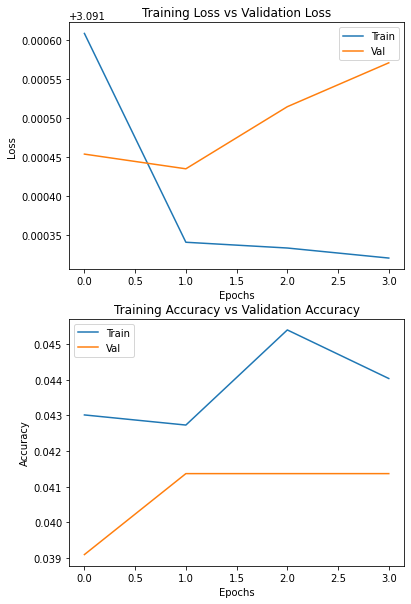

In [ ]:
#Plotting Traning and Validation Loss,Accuracy of Models
#Loss
fig, axs = plt.subplots(2, 1, figsize=(6,10))
axs[0].plot(gru.history['loss'])
axs[0].plot(gru.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

#Accuracy
axs[1].plot(gru.history['accuracy'])
axs[1].plot(gru.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

**Prediction on Test Data**

In [ ]:
#Making Prediction for each model
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Predicted Output
pred

array([18, 16, 16, ..., 14, 10,  8])

In [ ]:
#Converting Matrix Labels data to Single Digit
slabels=np.argmax(y_test, axis=1)
slabels[13]

ValueError: ignored

**F1 Macro**

In [ ]:
# Calculating F1-score for Model
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
print("F1-score of RNN GRU Model:",f1_score(y_test,pred, average='macro'))

F1-score of RNN GRU Model: 0.9152593352176693


**Confusion Matrix**

Accuracy for BERT Multi-Cased-Model :  0.9140909090909091
F1 score (micro) for BERT Multi-Cased-Model  :  0.9140909090909091
F1 score (macro) for BERT Multi-Cased-Model  :  0.9152593352176693
Precision Score for BERT Multi-Cased-Model  :  0.9148837138881568


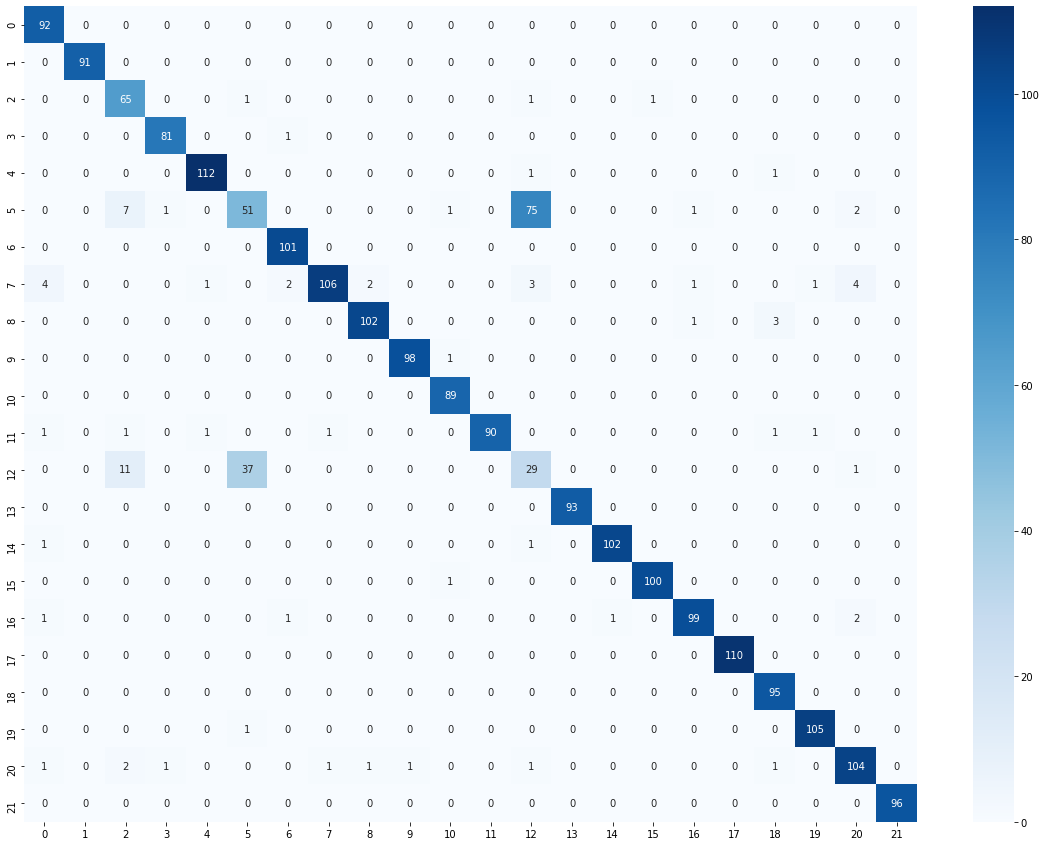

In [33]:
#Create confusion matrix for GRU Model
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score
cnf_metrics = confusion_matrix(pred,y_test)
cnf_metrics

#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(cnf_metrics, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

#Calculating accuracy based in the confusion matrix for GRU Model
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
bert_accuracy = cnf_metrics.trace()/cnf_metrics.sum()
print("Accuracy for GRU Model : ", bert_accuracy)

#Getting F1 micro score for GRU Model
from sklearn.metrics import f1_score
bert_f1 = f1_score(pred,y_test, average = 'micro')
print("F1 score (micro) for GRU Model : ", bert_f1)

#Getting F1 macro score for GRU Model 
from sklearn.metrics import f1_score
bert_f1_ma = f1_score(pred,y_test, average = 'macro')
print("F1 score (macro) for GRU Model : ", bert_f1_ma)

bert_precision = precision_score(pred,y_test, average = 'macro')
print("Precision Score for GRU Model : ", bert_precision)


In [37]:
#Making Prediction for LSTM Model
pred_lstm = model2.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy for LSTM Model :  0.9077272727272727
F1 score (micro) for LSTM Model :  0.9077272727272727
F1 score (macro) for LSTM Model :  0.8947894314662708
Precision Score for LSTM Model  :  0.9114058104186994


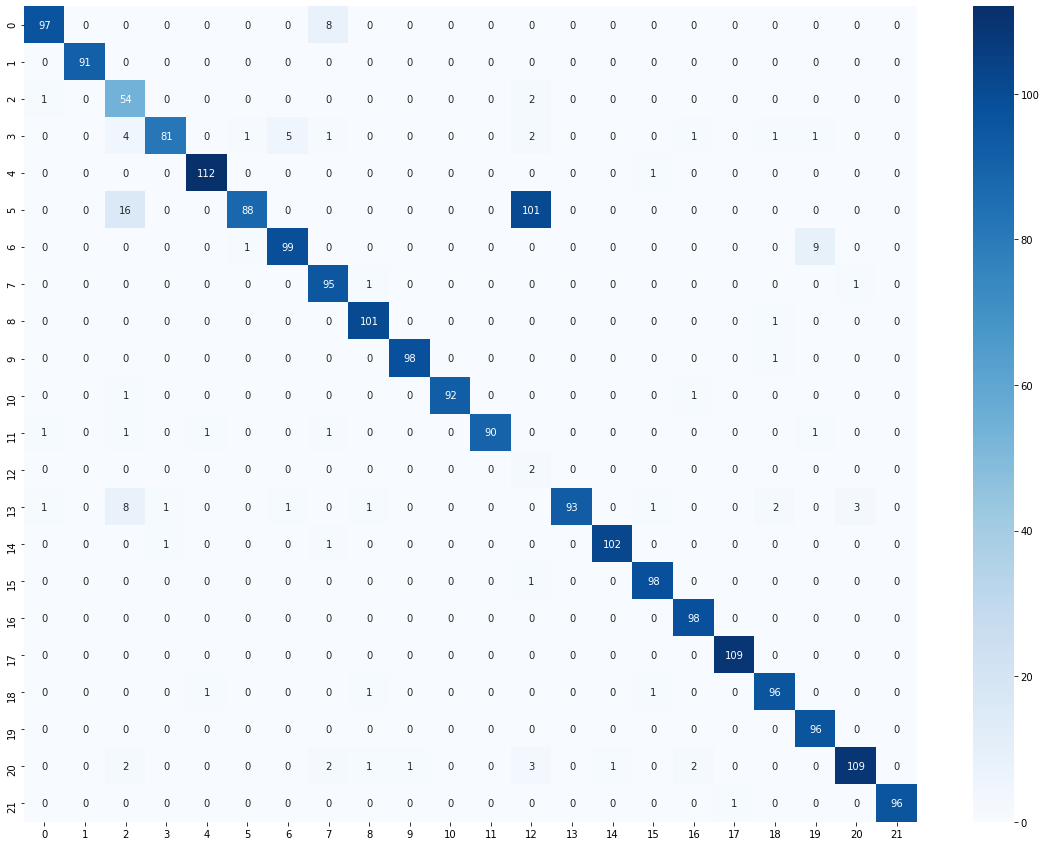

In [39]:
#Create confusion matrix for LSTM Model
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score
cnf_metrics_lstm = confusion_matrix(pred_lstm,y_test)
cnf_metrics_lstm

#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(cnf_metrics_lstm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

#Calculating accuracy based in the confusion matrix for LSTM Model 
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
lstm_accuracy = cnf_metrics_lstm.trace()/cnf_metrics.sum()
print("Accuracy for LSTM Model : ", lstm_accuracy)

#Getting F1 micro score for LSTM Model 
from sklearn.metrics import f1_score
lstm_f1 = f1_score(pred_lstm,y_test, average = 'micro')
print("F1 score (micro) for LSTM Model : ", lstm_f1)

#Getting F1 macro score for LSTM Model
from sklearn.metrics import f1_score
lstm_f1_ma = f1_score(pred_lstm,y_test, average = 'macro')
print("F1 score (macro) for LSTM Model : ", lstm_f1_ma)

lstm_precision = precision_score(pred_lstm,y_test, average = 'macro')
print("Precision Score for LSTM Model  : ", lstm_precision)
